# Name: Amisha Jitendra Jain
# Gmail: amisha72000@gmail.com
# LinkedIn: https://www.linkedin.com/in/amisha-jain-4302b01b4/
# GitHub: https://github.com/amisha-74/coding
# Task-5 Stock Market Prediction using Numerical and Textual Analysis

## Importing Needed Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns

In [2]:
import matplotlib as mpl
from matplotlib import style

#Adjusting the size of matplotlib

mpl.rc('figure', figsize = (15 , 15))
mpl.__version__

#Adjusting the style of matplotlib

style.use('ggplot')

In [3]:
!pip install pandas-datareader

You should consider upgrading via the 'C:\Users\91771\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

## Pandas web data reader is an extension of pandas library to communicate with most updated Financial Data

In [5]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

In [6]:
df = web.DataReader("AAPL", 'yahoo', start, end)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.471691
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.071579
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.723213
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.909149
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.500275
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.673225


## Rolling Mean (Moving Average)

### To determine trend - The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

In [9]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.head(10)

Date
2009-12-31   NaN
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
Name: Adj Close, dtype: float64

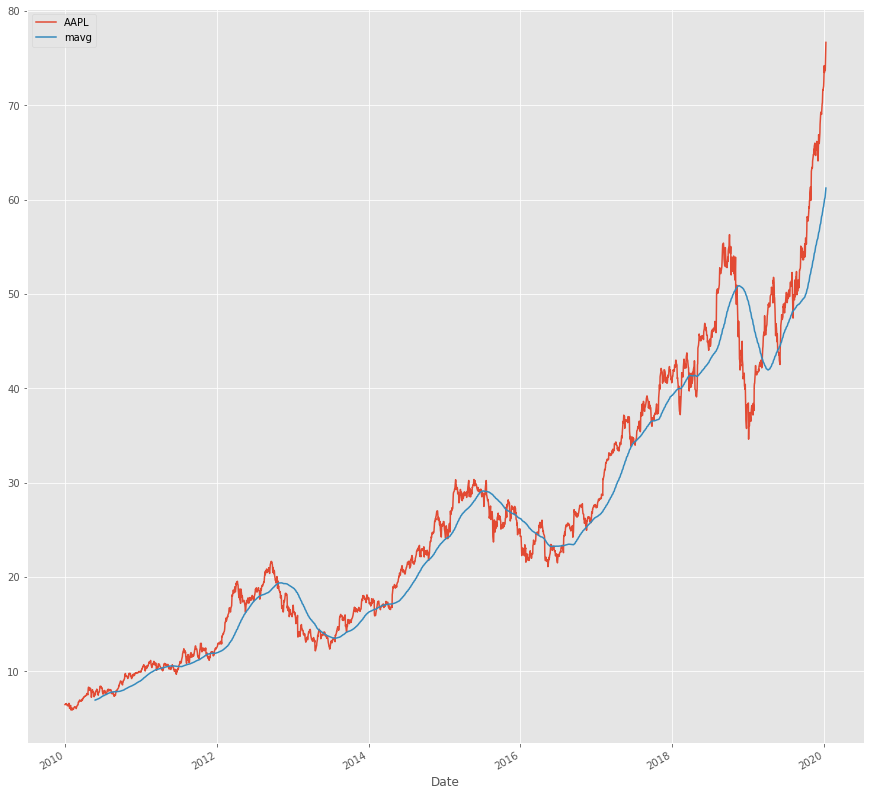

In [10]:
close_px.plot(label = 'AAPL')
mavg.plot(label = 'mavg')
plt.legend()
plt.show()


### In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stock and experiencing upturn.

## Return Deviation

### to determine risk and return

### Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment - investopedia

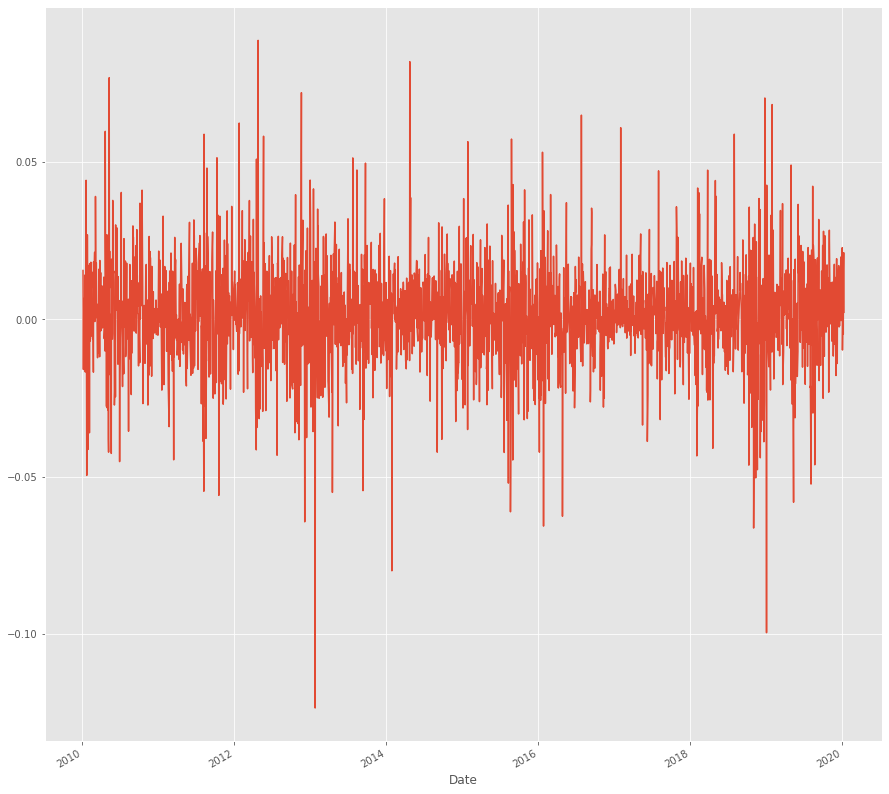

In [11]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label = 'return')
plt.show()


### logically, our ideal stocks should return as high and stable as possible. if you are risk averse, you might want to avoid this stocks as you saw the 10% drop in 2013. This decision is heavily subjected to your general sentiment of stocks and competitor analysis.

## Analysis Competitors Stocks

### In this segment , we are going to analyse on how one company performs in relative with its competitors. Let'sassume we are intrested in technology companies and want to compare the big guns: Apple, GE, Google, IBM, and Microsoft.

In [12]:
df.comp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start = start, end = end)['Adj Close']
df.comp.head(10)

<ipython-input-12-9f5c30a4b9e2>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.comp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start = start, end = end)['Adj Close']


Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,6.471691,10.765992,308.832428,90.435410,23.630186
2010-01-04,6.572422,10.993693,312.204773,91.506264,23.994564
2010-01-05,6.583784,11.050618,310.829926,90.400902,24.002319
2010-01-06,6.479061,10.993693,302.994293,89.813629,23.855013
2010-01-07,6.467082,11.562950,295.940735,89.502716,23.606922
2010-01-08,6.510078,11.811997,299.885956,90.400902,23.769743
2010-01-11,6.452650,11.925844,299.432648,89.454376,23.467388
2010-01-12,6.379251,11.932961,294.137512,90.165970,23.312330
2010-01-13,6.469232,11.975655,292.448822,89.972527,23.529409


## Correlation Analysis

### Does one competitor afeect others?
### We can analyse the competition by running the percentage change and correlation function in pandas. Percentage change will find how the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks returns

In [13]:
retscomp = df.comp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.021150,0.010920,0.011841,0.015420
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005151,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008821,0.009638,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006607
2010-01-13,0.014105,0.003578,-0.005741,-0.002145,0.009312


### To prove the positive correlations, we will use heat map to visualize the correlation ranges among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

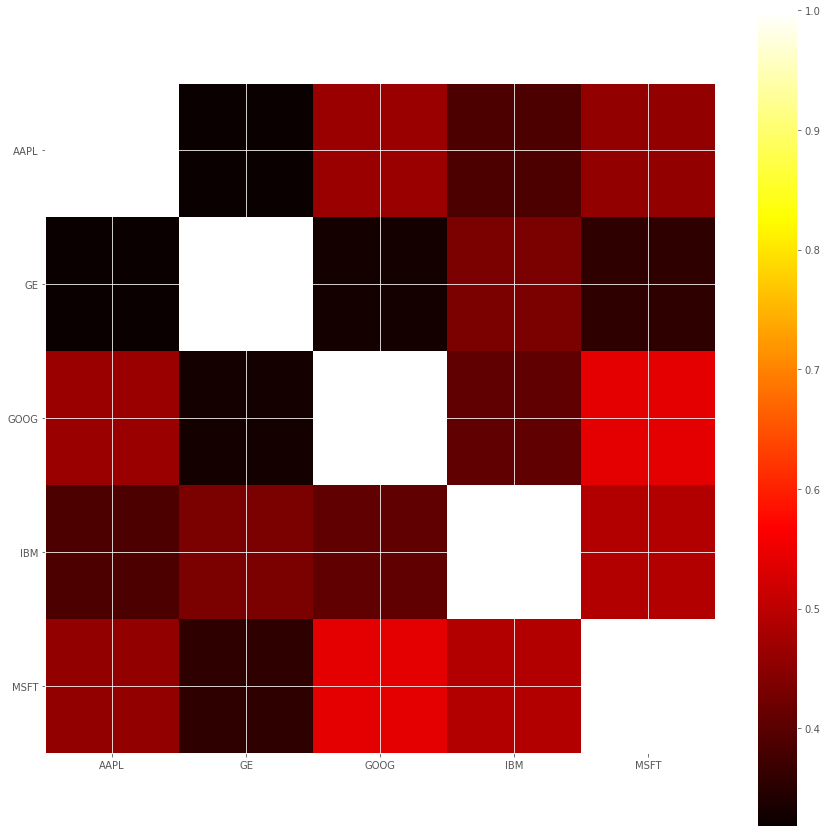

In [14]:
plt.imshow(corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

### From the scatter matrix and heatmap, we can find great correlations among the competing stocks.However, this might not show causally, and could just show the trend in the technology industry rather than show how competing stocks affect each other.

## Stocks Return Rate and Risk
### Apart from correlation, we also analyse each stock's risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of raturns (Risk)

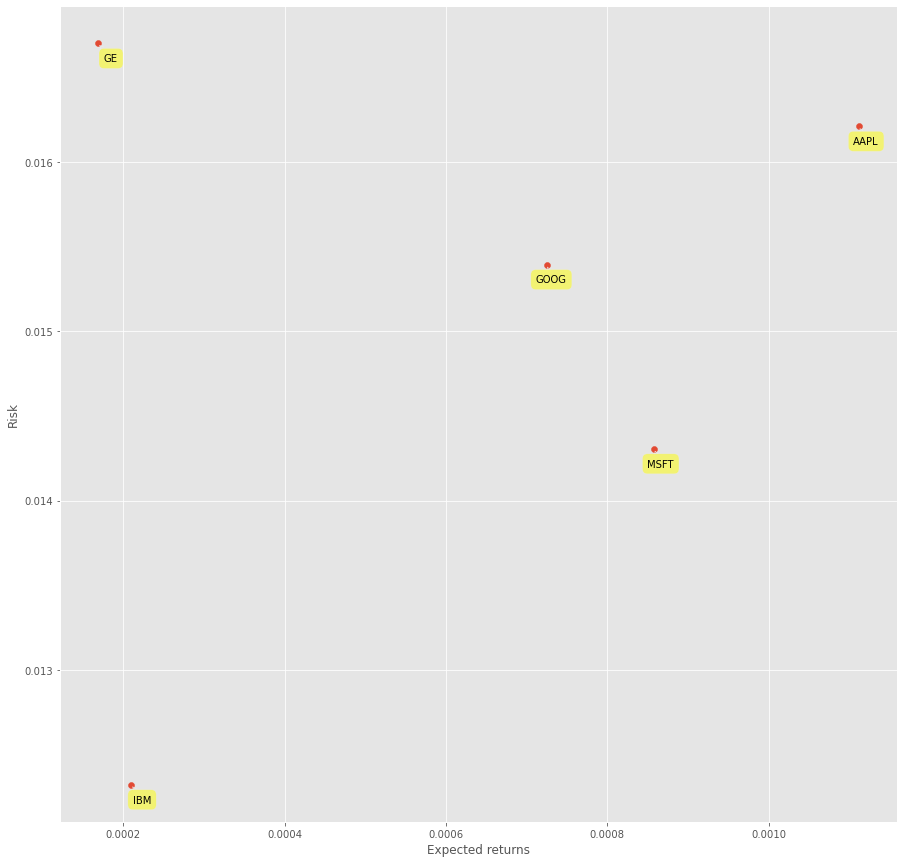

In [15]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label, xy = (x , y), xytext = (20 , -20), textcoords = 'offset points',
                 ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'yellow',
                 alpha = 0.5), arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0'))

## India-News-Headlines file imported and doing Numerical Analysis

In [18]:
df1 = pd.read_csv(r"C:\Users\91771\Downloads\india-news-headlines.csv")

In [19]:
df1.head(10)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [20]:
df1.tail(10)

,publish_date,headline_category,headline_text
3424057,20201231,india,50 NRIs reach Singhu; offer help to farmers
3424058,20201231,city.amritsar,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,20201231,city.bengaluru,Azim Premji organisation's name misused to che...
3424060,20201231,india,Get govt nod to probe officials: MP to agencies
3424061,20201231,city.bengaluru,Peddler nabbed; 10kg ganja seized in Anantapur...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


## Data Exploration

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [22]:
df1.describe()

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


In [23]:
df1.max()

publish_date                                                  20201231
headline_category                                          young-turks
headline_text        Why should girls have all the fun? Boys prep ...
dtype: object

In [24]:
df1.min()

publish_date                                20010102
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [25]:
df1['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [26]:
#In case of null values

df1.isnull().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [27]:
df1.corr()

,publish_date
publish_date,1.0


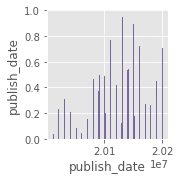

In [28]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

In [29]:
df1['headline_text'].value_counts()

Straight Answers                                                        6723
Cartoons                                                                1536
Straight answers                                                        1500
Photogallery                                                            1353
Your say                                                                1012
                                                                        ... 
Jug Suraiya: Foreign to policy                                             1
Mr. D.D. Anand                                                             1
Mumbai's Parsi hospital deal faces legal hurdle                            1
Two children drown in a pond                                               1
Parties; lawyers slam Australian govt over handling of Haneef's case       1
Name: headline_text, Length: 3168800, dtype: int64

In [30]:

df1['headline_category'].value_counts()

india                                              288541
unknown                                            209582
city.mumbai                                        134428
city.delhi                                         127717
business.india-business                            116761
                                                    ...  
elections.lok-sabha-elections-2019.tripura.news         8
sports.cricket.sri-lanka-in-new-zealand                 8
preeti-shenoy                                           8
advanis-us-visit                                        8
sports.cricket.icc-world-cup.teams.england              8
Name: headline_category, Length: 1013, dtype: int64

## Exploratory Data Analysis using NLP and NLTK tools

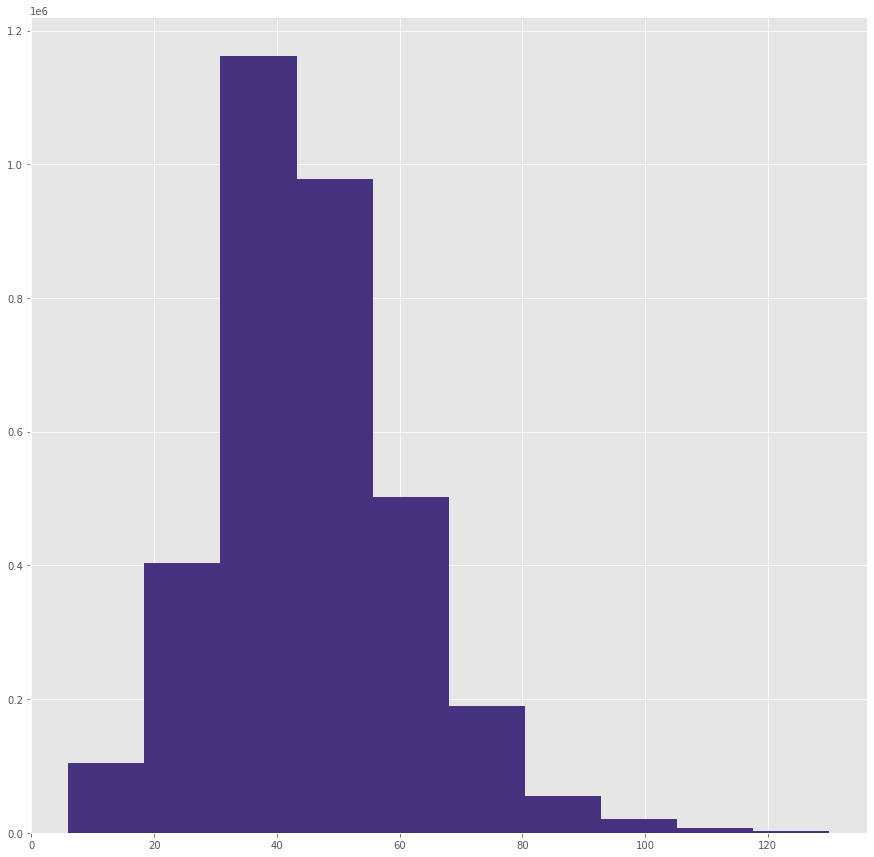

In [31]:
df1['headline_text'].str.len().hist()
plt.show()

### This histogram shows that news headlines range from 10 to 70 characters and generally, it is between 25 to 55 characters. now, we will move on to data exploration at a word-level. let's plot the number of words appearing in each news headline.

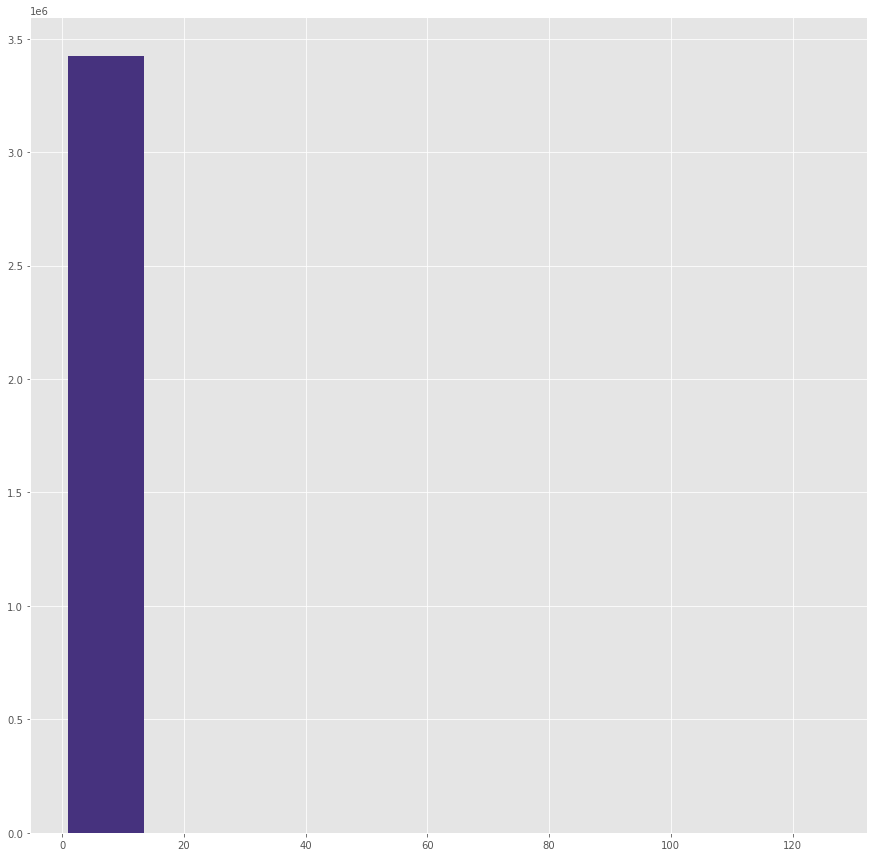

In [32]:
df1['headline_text'].str.split().\
    apply(lambda x : [len(i) for i in x]).\
    map(lambda x : np.mean(x)).hist()
plt.show()

### The average word length ranges between 1 to 18 with 10 being the most common length. Does it mean that people are using really short words in news headlines? Lets find out. One reason, why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as "the", "an", "a" etc. As these words probably small in length these words may have caused the above graph to be left-skewed.

### Analyzing the amount and the types of stopwords can give us some good insights into the data. To get the corpus containing stopwords you can use the #nltk library. Nltk contains stopwords from many languages, since we are only dealing with english news. I will filter the english stopwords from the corpus

In [33]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91771\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [34]:
corpus = []
new = df1['headline_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [35]:
from collections import defaultdict

dict = defaultdict(int)
for word in corpus:
    if word in stop:
        dict[word]+=1

### Now we know which stopwords occur frquently in our text, let's inspect which words other than these stopwords occur frequently. We will use the counter function from the collection library to count and store the occurrences of each word in a list of tupples.

In [36]:
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

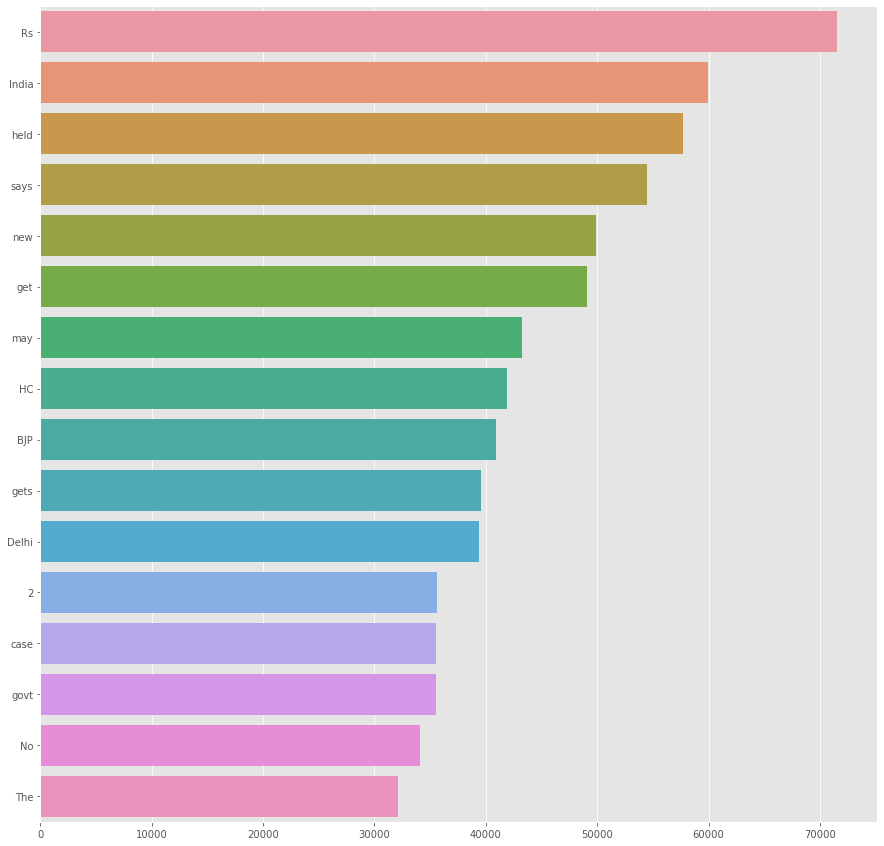

In [37]:
sns.barplot(x = y , y = x)
plt.show()

### wow! the "Rs", "India" and "held" dominate the headlines over the last 15 year but when we observe other words in the graph they are all related to the RS - India

## Ngram Exploration
### Ngram are simply contiguous sequences of n words. For example "riverbank", "The three muskedteers" etc. If the number of words is 2, It is called bigram. For 3 words it is called a trigram and so on.

In [38]:
from nltk.util import ngrams
list(ngrams(['I' , 'went', 'to', 'the', 'river', 'bank'], 2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n , n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_frq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_feq = sorted(words_frq, key = lambda x : x[1], reverse = True)
    return words_frq[:10]

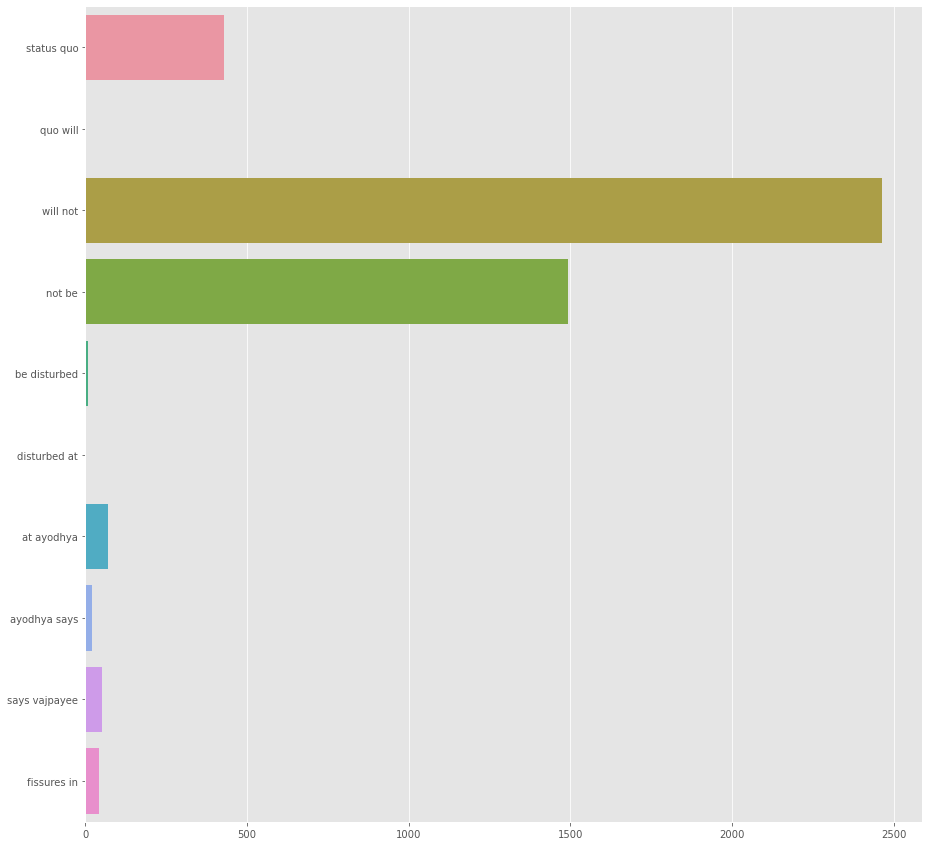

In [40]:
top_n_bigrams = get_top_ngram(df1['headline_text'], 2)[:10]
x,y = map(list, zip(*top_n_bigrams))
sns.barplot(x = y, y = x)
plt.show()

## Textblob

In [17]:
!pip install textblob

You should consider upgrading via the 'C:\Users\91771\anaconda3\python.exe -m pip install --upgrade pip' command.


In [41]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score'] = df1['headline_text'].\
   apply(lambda x : polarity(x))
df1['polarity_score'].hist()
plt.show()

In [ ]:
def sentiment(x):
    if x < 0:
        return 'negative'
    elif x == 0:
        return 'neutral'
    else:
        return 'positive'
    
df1['polarity'] = df1['polarity_score'].\
   map(lambda x : sentiment(x))
plt.bar(df1.polarity.value_counts().index,
        df1.polarity.value_counts())
plt.show()

In [ ]:
df1[df1['polarity'] == 'positive']['headline_text'].head()

In [ ]:
df1[df1['polarity'] == 'negative']['headline_text'].head()